# Introduction

The purpose of this project is to analyze GDP and life expectancy data from the World Health Organization 
and the World Bank, particularly to identify the relationship between the GDP and life expectancy of six sampled countries.

This project will scope, analyze, prepare, plot data, and seek to explain the findings from the analysis.

Here are a few questions that this project has sought to answer:

- Has life expectancy increased over time in the six sampled nations?
- Has GDP increased over time in the six sampled nations?
- Is there a correlation between GDP and life expectancy of a country?
- What is the average life expectancy in these nations?

**Data sources:**

The data set - `all_data.csv` was provided by [Codecademy.com](https://www.codecademy.com) and was acquired from:
- GDP Source: [World Bank](https://data.worldbank.org/indicator/NY.GDP.MKTP.CD)
- Life expectancy Data Source: [World Health Organization](http://apps.who.int/gho/data/node.main.688)

## Scoping

It's beneficial to create a project scope whenever a new project is being started. Four sections were created below to help guide the project's process and progress. The first section is the project goals; this section will define the high-level objectives and set the intentions for this project. The next section is the data. Luckily, in this project, data is already provided, but it still needs to be checked to see if project goals can be met with the available data. Thirdly, the analysis will have to be thought through, including methods and questions that are aligned with the project goals. Lastly, an evaluation will help us build conclusions and findings from our analysis.

### Project Goals

In this project, the perspective will be through an economic and public health analyst. The project seeks to provide insights into international economic and health development by using data sourced from the World Bank and the World Health Organization. Therefore, the main objective is to analyze GDP and life expectancy data from six sampled countries to understand their relationship and trends over time. Specifically, the project aims to achieve the following goals:

- Has life expectancy increased over time in the six sampled nations?
- Has GDP increased over time in the six sampled nations?
- Is there a correlation between GDP and life expectancy of a country?
- What is the average life expectancy in these nations?

### Data

This project has the data set that came with the package. Provided `csv` file contains information about each country, as well as their Life expectancy and GDP, divided by year from 2000 to 2015. This data will be used to analyze the goals of the project. 

### Analysis

In this section, descriptive statistics and data visualization techniques will be employed to understand the data better. Statistical inference will also be used to test if the observed values are statistically significant. Some of the key metrics that will be computed include: 

1. Relationship between countries
1. Life expectancy at birth by years
1. Gross domestic product by countries

### Evaluation

Lastly, it's a good idea to revisit the goals and check if the output of the analysis corresponds to the questions first set to be answered (in the goals section). This section will also reflect on what has been learned through the process and if any of the questions were unable to be answered. This could also include limitations or if any of the analysis could have been done using different methodologies.

## Import Python Modules

First, import the primary modules that will be used in this project:

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

## Loading the Data

To analyze the status of sampled countries and their metrics, load the datasets into `DataFrame`. Once loaded as `DataFrame` the data can be explored and visualized using Python.

In the next steps, `all_data.csv` is read in as `DataFrame` called `all_data` respectively. The newly created `DataFrame` is glimpsed with `.head()` and `.count()` to check its content and quantity.

In [2]:
all_data = pd.read_csv("all_data.csv")

In [3]:
print(all_data.head())
print(all_data.count())

  Country  Year  Life expectancy at birth (years)           GDP
0   Chile  2000                              77.3  7.786093e+10
1   Chile  2001                              77.3  7.097992e+10
2   Chile  2002                              77.8  6.973681e+10
3   Chile  2003                              77.9  7.564346e+10
4   Chile  2004                              78.0  9.921039e+10
Country                             96
Year                                96
Life expectancy at birth (years)    96
GDP                                 96
dtype: int64


## Analysis

#### Changes in life expectancy over time

To examine the changes in life expectancy over time across the six sampled nations, aligning with our first project goal, we will create a plot. This visualization will help identify any differences, gaps, outliers, or anomalies within the data frame.

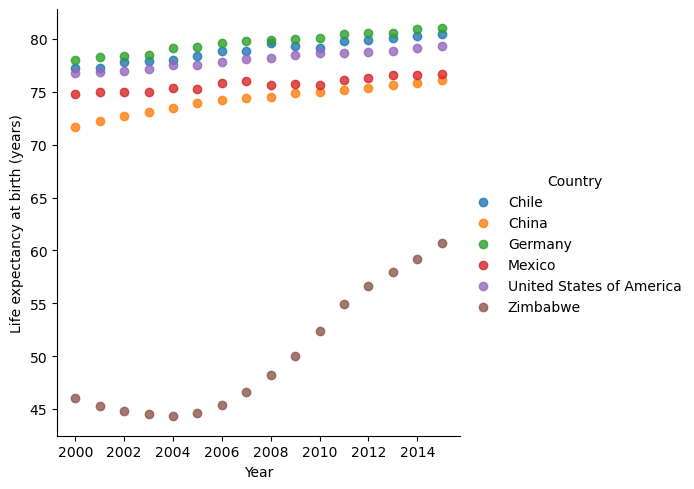

<Figure size 640x480 with 0 Axes>

In [4]:
sns.lmplot(x = 'Year', y = 'Life expectancy at birth (years)', data = all_data, fit_reg = False, hue = 'Country')
plt.show()
plt.clf()

We were able to visualize our data by using a seaborn plot, and now we see changes in life expectancy divided by sampled countries. Also, from the visualization made, we can assume that life expectancy dynamics of Zimbabwe is lower than in other countries.

In [5]:
min_value = all_data.loc[all_data['Life expectancy at birth (years)'].idxmin()]
min_value

Country                                 Zimbabwe
Year                                        2004
Life expectancy at birth (years)            44.3
GDP                                 5805598400.0
Name: 84, dtype: object

To enhance the accuracy of our analysis, it would be advantageous to examine the data for `outliers` using the `Z-score` test. 

Specifically, any data point with a Z-score exceeding 3 or falling below -3 is considered significantly different from the rest of the dataset, and thus, is classified as an outlier. 

In [6]:
z_scores = stats.zscore(all_data['Life expectancy at birth (years)'])
all_data.insert(4, 'life_exp_z_scores', z_scores, True)

In [7]:
all_data

,Country,Year,Life expectancy at birth (years),GDP,life_exp_z_scores
0,Chile,2000,77.3,7.786093e+10,0.424824
1,Chile,2001,77.3,7.097992e+10,0.424824
2,Chile,2002,77.8,6.973681e+10,0.471917
3,Chile,2003,77.9,7.564346e+10,0.481336
4,Chile,2004,78.0,9.921039e+10,0.490755
...,...,...,...,...,...
91,Zimbabwe,2011,54.9,1.209845e+10,-1.684971
92,Zimbabwe,2012,56.6,1.424249e+10,-1.524852
93,Zimbabwe,2013,58.0,1.545177e+10,-1.392990
94,Zimbabwe,2014,59.2,1.589105e+10,-1.279965


In [8]:
min_value = all_data.loc[all_data['life_exp_z_scores'].idxmin()]
min_value

Country                                 Zimbabwe
Year                                        2004
Life expectancy at birth (years)            44.3
GDP                                 5805598400.0
life_exp_z_scores                      -2.683355
Name: 84, dtype: object

Following our calculation, it has been determined that the lowest Z-score value is greater than -3, which does not make it an `outlier`. The next step is the calculation of the difference in life expectancy over time, allowing us to analyze trends and identify any significant changes in this metric.

In [9]:
lifeexp_avg_2000 = all_data[all_data['Year'] == 2000]['Life expectancy at birth (years)'].mean()
lifeexp_avg_2015 = all_data[all_data['Year'] == 2015]['Life expectancy at birth (years)'].mean()
lifeexp_avg_diff = lifeexp_avg_2015 - lifeexp_avg_2000

print('Average life expectancy at 2000 was: ' + str(lifeexp_avg_2000.round(2)) + ' years')
print('Average life expectancy at 2015 was: ' + str(lifeexp_avg_2015.round(2)) + ' years')
print('Difference in life expectancy betwwen 2000 and 2015 is ' + str(lifeexp_avg_diff.round(2)) + ' years')

Average life expectancy at 2000 was: 70.77 years
Average life expectancy at 2015 was: 75.72 years
Difference in life expectancy betwwen 2000 and 2015 is 4.95 years


Life expectancy increased by 4.95 years over 15 years in the six sampled nations.

#### Changes in GDP over time

To analyze the differences in GDP over time across the six sampled nations, our initial step involves converting the `GDP` values to `GDP in trillions USD`. This conversion facilitates more convenient and meaningful comparisons within the dataset.

In [10]:
GDP_trill = all_data['GDP'] / 1000000000000
all_data.insert(4, 'GDP in trillions USD', GDP_trill, True)

In [11]:
all_data

,Country,Year,Life expectancy at birth (years),GDP,GDP in trillions USD,life_exp_z_scores
0,Chile,2000,77.3,7.786093e+10,0.077861,0.424824
1,Chile,2001,77.3,7.097992e+10,0.070980,0.424824
2,Chile,2002,77.8,6.973681e+10,0.069737,0.471917
3,Chile,2003,77.9,7.564346e+10,0.075643,0.481336
4,Chile,2004,78.0,9.921039e+10,0.099210,0.490755
...,...,...,...,...,...,...
91,Zimbabwe,2011,54.9,1.209845e+10,0.012098,-1.684971
92,Zimbabwe,2012,56.6,1.424249e+10,0.014242,-1.524852
93,Zimbabwe,2013,58.0,1.545177e+10,0.015452,-1.392990
94,Zimbabwe,2014,59.2,1.589105e+10,0.015891,-1.279965


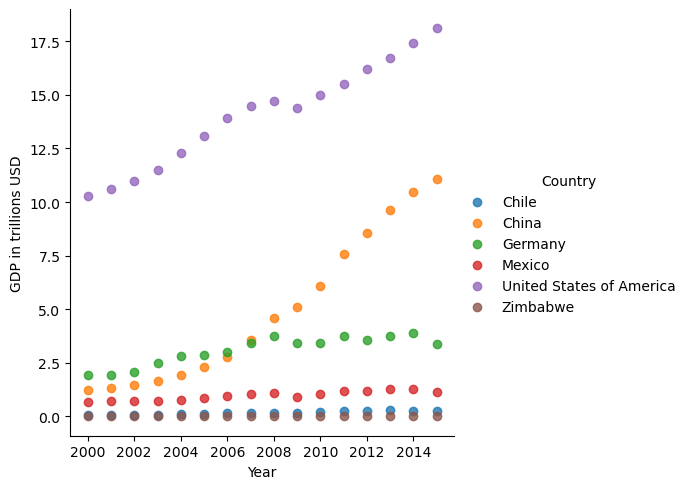

<Figure size 640x480 with 0 Axes>

In [12]:
sns.lmplot(x = 'Year', y = 'GDP in trillions USD', data = all_data, fit_reg = False, hue = 'Country')
plt.show()
plt.clf()

A visualization has been generated to show the changes in GDP over time for the six sampled nations. Like in a plot 'Changes in life expectancy over time' it indicates that the United States of America exhibits higher GDP growth dynamics than the other countries.

In [13]:
max_value = all_data.loc[all_data['GDP'].idxmax()]
max_value

Country                             United States of America
Year                                                    2015
Life expectancy at birth (years)                        79.3
GDP                                         18100000000000.0
GDP in trillions USD                                    18.1
life_exp_z_scores                                   0.613198
Name: 79, dtype: object

As in a previous project part, 'Changes in life expectancy over time,' the data for `outliers` is examined using the `Z-score` test.

In [14]:
z_scores_gdp = stats.zscore(all_data['GDP'])
all_data.insert(6, 'GDP_z_scores', z_scores_gdp, True)

In [15]:
all_data

,Country,Year,Life expectancy at birth (years),GDP,GDP in trillions USD,life_exp_z_scores,GDP_z_scores
0,Chile,2000,77.3,7.786093e+10,0.077861,0.424824,-0.735460
1,Chile,2001,77.3,7.097992e+10,0.070980,0.424824,-0.736791
2,Chile,2002,77.8,6.973681e+10,0.069737,0.471917,-0.737031
3,Chile,2003,77.9,7.564346e+10,0.075643,0.481336,-0.735889
4,Chile,2004,78.0,9.921039e+10,0.099210,0.490755,-0.731331
...,...,...,...,...,...,...,...
91,Zimbabwe,2011,54.9,1.209845e+10,0.012098,-1.684971,-0.748179
92,Zimbabwe,2012,56.6,1.424249e+10,0.014242,-1.524852,-0.747764
93,Zimbabwe,2013,58.0,1.545177e+10,0.015452,-1.392990,-0.747531
94,Zimbabwe,2014,59.2,1.589105e+10,0.015891,-1.279965,-0.747446


In [16]:
max_value = all_data.loc[all_data['GDP_z_scores'].idxmax()]
max_value

Country                             United States of America
Year                                                    2015
Life expectancy at birth (years)                        79.3
GDP                                         18100000000000.0
GDP in trillions USD                                    18.1
life_exp_z_scores                                   0.613198
GDP_z_scores                                        2.750164
Name: 79, dtype: object

The result of our calculation has been determined that the greatest Z-score value is lower than 3, which does not make it an `outlier`.

In [17]:
GDP_avg_2000 = all_data[all_data['Year'] == 2000]['GDP in trillions USD'].mean()
GDP_avg_2015 = all_data[all_data['Year'] == 2015]['GDP in trillions USD'].mean()
GDP_avg_diff = GDP_avg_2015 - GDP_avg_2000

print('Average GDP at 2000 was: ' + str(GDP_avg_2000.round(2)) + ' trillions USD')
print('Average GDP at 2015 was: ' + str(GDP_avg_2015.round(2)) + ' trillions USD')
print('Difference in GDP betwwen 2000 and 2015 is ' + str(GDP_avg_diff.round(2)) + ' trillions USD')

Average GDP at 2000 was: 2.37 trillions USD
Average GDP at 2015 was: 5.66 trillions USD
Difference in GDP betwwen 2000 and 2015 is 3.29 trillions USD


GDP dynamics increased by 3.29 trillions United States dollars over 15 years in the six sampled nations.

#### GDP and life expectancy correlation

This section conducts tests using the `Pearson coefficient` to determine the correlation between GDP and a country's life expectancy.

In [18]:
mean_data = all_data.groupby('Country').mean().reset_index()
mean_data

,Country,Year,Life expectancy at birth (years),GDP,GDP in trillions USD,life_exp_z_scores,GDP_z_scores
0,Chile,2007.5,78.94375,1.697888e+11,0.169789,0.579644,-0.717681
1,China,2007.5,74.26250,4.957714e+12,4.957714,0.138730,0.208342
2,Germany,2007.5,79.65625,3.094776e+12,3.094776,0.646752,-0.151965
3,Mexico,2007.5,75.71875,9.766506e+11,0.976651,0.275890,-0.561627
4,United States of America,2007.5,78.06250,1.407500e+13,14.075000,0.496641,1.971697
5,Zimbabwe,2007.5,50.09375,9.062580e+09,0.009063,-2.137658,-0.748766


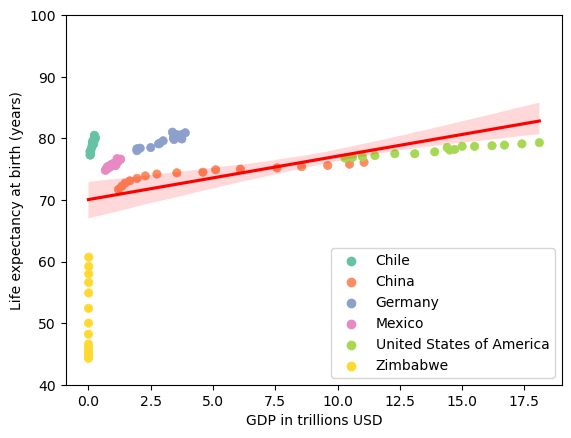

In [19]:
sns.scatterplot(
  y='Life expectancy at birth (years)', 
  x='GDP in trillions USD', 
  data = all_data, 
  hue = 'Country',
  palette=sns.color_palette("Set2"),
  edgecolor=None
)
sns.regplot(
  y='Life expectancy at birth (years)', 
  x='GDP in trillions USD', 
  data=all_data, 
  scatter=False,
  color = 'red'
)
plt.ylim(40, 100)
plt.legend(loc='lower right')
plt.show()

To ascertain the correlation between these two indices, the `Pearson coefficient` is employed.

The degrees of correlation are categorized as follows:
- Perfect: Values near ±1 indicate a perfect correlation, where one variable’s increase (or decrease) is mirrored by the other.
- High Degree: Values between ±0.50 and ±1 suggest a strong correlation.
- Moderate Degree: Values between ±0.30 and ±0.49 indicate a moderate correlation.
- Low Degree: Values below +0.29 are considered a weak correlation.
- No Correlation: A value of zero implies no relationship.

In [20]:
r = np.corrcoef(all_data['GDP in trillions USD'], all_data['Life expectancy at birth (years)'])
print('Pearsons correlation: ' + str(round(r[0][1], 3)))

Pearsons correlation: 0.343


Mexico and Chile have short range of changes in their values. Therefore, we will exclude these countries from the analysis to determine if the `Pearson coefficient` changes.

In [21]:
countries_to_exclude = ['Mexico', 'Chile']
filtered_df = all_data[~all_data['Country'].isin(countries_to_exclude)]
filtered_df

,Country,Year,Life expectancy at birth (years),GDP,GDP in trillions USD,life_exp_z_scores,GDP_z_scores
16,China,2000,71.7,1.211350e+12,1.211350,-0.102625,-0.516234
17,China,2001,72.2,1.339400e+12,1.339400,-0.055531,-0.491469
18,China,2002,72.7,1.470550e+12,1.470550,-0.008438,-0.466103
19,China,2003,73.1,1.660290e+12,1.660290,0.029237,-0.429406
20,China,2004,73.5,1.955350e+12,1.955350,0.066912,-0.372339
...,...,...,...,...,...,...,...
91,Zimbabwe,2011,54.9,1.209845e+10,0.012098,-1.684971,-0.748179
92,Zimbabwe,2012,56.6,1.424249e+10,0.014242,-1.524852,-0.747764
93,Zimbabwe,2013,58.0,1.545177e+10,0.015452,-1.392990,-0.747531
94,Zimbabwe,2014,59.2,1.589105e+10,0.015891,-1.279965,-0.747446


In [22]:
corr, _ = pearsonr(filtered_df['GDP in trillions USD'], filtered_df['Life expectancy at birth (years)'])
print('Pearsons correlation: %.3f' % corr)

NameError: name 'pearsonr' is not defined

This part of the analysis reveals that the six sampled countries exhibit a `Moderate Degree` of correlation. When Mexico and Chile are excluded, the correlation increases to a `High Degree`.

#### Average life expectancy

The final phase of our analysis will involve calculating the mean data from the `all_data` data frame. This will provide insight into the relative positions of the sampled countries, allowing us to understand how each nation ranks in terms of life expectancy.

In [ ]:
mean_data = mean_data.sort_values(by='Life expectancy at birth (years)', ascending=False)
mean_data['Country'] = mean_data['Country'].replace('United States of America', 'USA')
mean_data[['Country', 'Life expectancy at birth (years)']]

,Country,Life expectancy at birth (years)
2,Germany,79.65625
0,Chile,78.94375
4,USA,78.06250
3,Mexico,75.71875
1,China,74.26250
5,Zimbabwe,50.09375


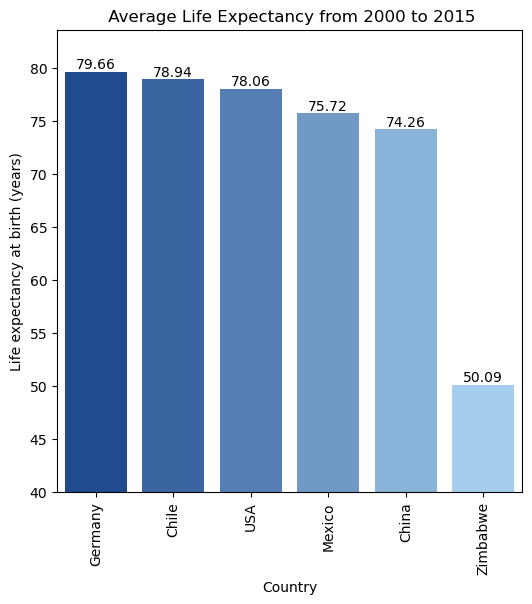

In [ ]:
palette = sns.blend_palette(["#0D47A1", "#99CEF9"], n_colors=len(mean_data), as_cmap=False)

plt.figure(figsize=(6, 6))
ax = sns.barplot(y='Life expectancy at birth (years)', x='Country', data=mean_data, palette=palette)
ax.bar_label(ax.containers[0], fontsize=10, fmt='%.2f')
plt.ylim(40)
plt.title(' Average Life Expectancy from 2000 to 2015')
# plt.xlabel('Life expectancy at birth (years)')
# plt.ylabel('Country')
plt.xticks(rotation=90)
plt.show()

The plot has been generated, displaying the average life expectancy for each country, arranged in descending order. A gradient color palette has been applied to visually represent the differences in life expectancy, with colors fading from the highest to the lowest rates.

In [ ]:
avg_6nations = round(mean_data['Life expectancy at birth (years)'].mean(), 2)
print('Average life expectancy in the six sampled nations is ' + str(avg_6nations) + ' years')

Average life expectancy in the six sampled nations is 72.79 years


## Conclusions

The project was able to make several data visualizations and inferences about sampled countries' indexes, such as GDP and Life expectancy, that comprised this data set.

This project was also able to answer some of the questions first posed in the beginning:

- Has life expectancy increased over time in the six sampled nations?
    - Yes, it has increased by 4.95 years from 2000 to 2015.
- Has GDP increased over time in the six sampled nations?
    - Yes, it has increased by 3.29 trillion USD from 2000 to 2015.
- Is there a correlation between GDP and life expectancy of a country?
    - Sampled countries have 0.343 points of Pearson's correlation, which is a 'Moderate Degree'. When Mexico and Chile are excluded, the correlation increases to 0.573 points, which is a 'High Degree'. This suggests that expanding the sample size could yield a more accurate correlation.
- What is the average life expectancy in these nations?
    - In these nations, average life expectancy is 72.79 years from 2000 to 2015.